Aide a la reconnaissance de texte pour ORC tesseract
====================================================

Appelle des librairies
----------------------

Cette exemple fait appelle aux bibliothèques de Python suivantes :

* OpenCV librarie de traitement d'image et vidéo qui a terme peut être integrer dans le système d'information.

Python

* matplotlib
* numpy
* scikit-image 
* scikit-learn
* PIL


In [1]:
import sys
for i in ['', '/usr/local/lib/python2.7/dist-packages/readline-6.2.4.1-py2.7-linux-x86_64.egg', '/usr/local/lib/python2.7/dist-packages/h5py-2.2.0-py2.7-linux-x86_64.egg', '/usr/local/lib/python2.7/dist-packages/PasteScript-1.7.5-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/PasteDeploy-1.5.2-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/Paste-1.7.5.1-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/ZopeSkel-3.0b3-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/templer.plone-1.0b4-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/templer.zope-1.0b2-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/templer.buildout-1.0b1-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/templer.core-1.0b4-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/templer.plone.localcommands-1.0b1-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/Cheetah-2.2.1-py2.7-linux-x86_64.egg', '/usr/local/lib/python2.7/dist-packages/templer.localcommands-1.0b2-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/zc.buildout-2.2.1-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/setuptools-2.1-py2.7.egg', '/usr/lib/python2.7/dist-packages', '/usr/local/lib/python2.7/dist-packages/mechanize-0.2.5-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/BeautifulSoup-3.2.1-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/Sphinx-1.2.2-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/Theano-0.6.0-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/matplotlib-1.5.dev1-py2.7-linux-x86_64.egg', '/usr/local/lib/python2.7/dist-packages/mock-1.0.1-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/nose-1.3.4-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/pyparsing-2.0.3-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/networkx-2.0.dev_20141224123558-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/decorator-3.4.0-py2.7.egg', '/usr/local/lib/python2.7/dist-packages/gensim-0.10.3-py2.7-linux-x86_64.egg', '/home/glagasse/Python/pylearn2', '/usr/local/lib/python2.7/dist-packages/kdtree-0.12-py2.7.egg', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/usr/lib/python2.7/lib-old', '/usr/lib/python2.7/lib-dynload', '/home/glagasse/.local/lib/python2.7/site-packages', '/usr/local/lib/python2.7/dist-packages']:
    sys.path.append(i)


In [5]:
sys.path.append('/home/glagasse/opencv/opencv/')

In [7]:
%matplotlib inline
import numpy as np
# Chargement de OpenCV 
import cv2

# Chargement des bibliothèque standard de traiment mathématique avec Numpy
# D'affichage avec matplotlib
# et PIL pour le traiment basique des images.


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import PIL

# Ensemble des fonction qui peuvent être utiliser dans le script pour le traitement.

from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage import data
from skimage.transform import pyramid_gaussian
from skimage import io
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage import data, color, exposure

from skimage.filter import threshold_otsu
from skimage.filter import threshold_adaptive
from skimage.filter import threshold_isodata
from skimage.filter import threshold_yen

from skimage.segmentation import clear_border
from skimage.morphology import label, closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb


lien = '/home/glagasse/Images_Ref/Exemple (10).jpg'
image = io.imread(lien)
Imag = PIL.Image.open(lien)
image = rgb2gray(image)

ImportError: dynamic module does not define init function (PyInit_cv2)

H.O.G.
-----

La fonction HOG prend un certain nombre de parametres en entre.
Elle fonction sur une etude de deriver sur l image et ses couleurs 

* Image a etudie
* Focus sur la taille des sous ensemble.
    - Nombre d orentitation dans la matrice du gradien. (le gradien est la generaliation de la derive pour un nombre supperieur a deux de dimension) 
    - Nombre de pixel par cellule
    - Nombre de cellule par Block

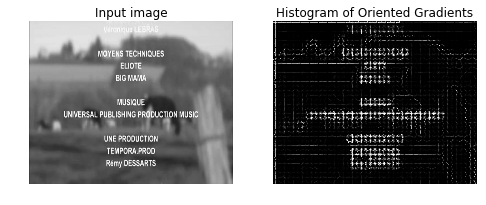

In [28]:
# hog_image est le resultat de l'image avec le descripteur HOG
# fd est la matrice gradien

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                    cells_per_block=(3, 3), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

(177L, 72L, 541L, 238L)
(0, 190L, 720, 360L)
(207L, 367L, 514L, 531L)
(347L, 451L, 422L, 503L)


/usr/local/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  connectivity=None):


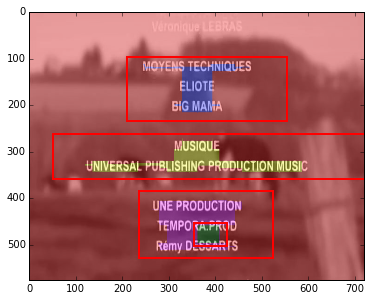

In [29]:
# apply threshold
thresh = threshold_yen(hog_image)
bw = closing(hog_image > 2*thresh, square(35))

# remove artifacts connected to image border
cleared = bw.copy()
clear_border(cleared)

# label image regions
label_image = label(cleared)
borders = np.logical_xor(bw, cleared)
label_image[borders] = -1
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image_label_overlay)
Img_liste = []
for region in regionprops(label_image):

    # skip small images
    if region.area > 500000:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    left = max(minc - int(0.3*(maxc - minc)),0)
    upper = max(maxr + int(0.18*(maxr - minr)),0)
    width = min(minr - int(0.18*(maxc - minc)),576)
    lower = min(maxc + int(0.3*(maxc - minc)),720)
    
    
    lower_ = min(int(1.5*(maxc - minc)),576-left)
    width_ = min(int(1.3*(maxr - minr)),720-upper)
    bbox = (left, width,lower, upper)
    
    if width_*lower_ > 1:
        print bbox
        rect = mpatches.Rectangle((minc-round(0.15*(maxc - minc)), minr-round(0.15*(maxr - minr))), round(1.5*(maxc - minc)), round(1.3*(maxr - minr)),
                              fill=False, edgecolor='red', linewidth=2)
        Img_liste.append(Imag.crop(bbox))
        ax.add_patch(rect)

plt.show()


<PIL.Image._ImageCrop image mode=RGB size=364x166 at 0x7F5E8929C710>
/home/glagasse/box_0.jpg


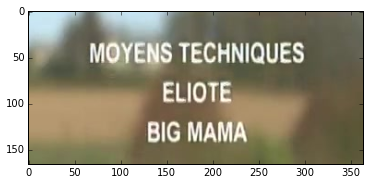

<PIL.Image._ImageCrop image mode=RGB size=720x170 at 0x7F5E8929C560>
/home/glagasse/box_1.jpg


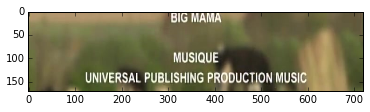

<PIL.Image._ImageCrop image mode=RGB size=307x164 at 0x7F5E892328C0>
/home/glagasse/box_2.jpg


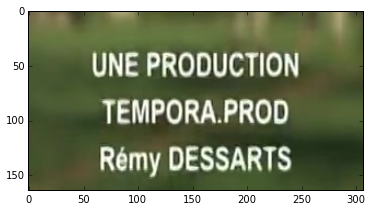

<PIL.Image._ImageCrop image mode=RGB size=75x52 at 0x7F5E892B97E8>
/home/glagasse/box_3.jpg


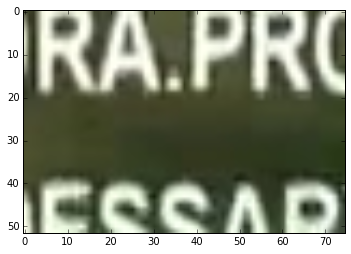

In [35]:
fig = plt.figure()
fig.savefig('/home/glagasse/resultat.png', dpi=fig.dpi)

j = 0

for i in Img_liste:
    print i
    print '/home/glagasse/box_'+str(j)+'.jpg'
    i.save('/home/glagasse/box_'+str(j)+'.png')
    plt.imshow(i)
    plt.show()
    j = j + 1



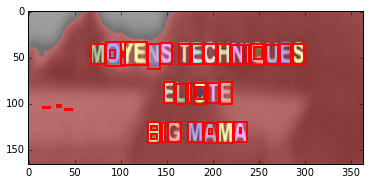

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb


image = io.imread('/home/glagasse/box_0.png')

image = rgb2gray(image)

thresh = threshold_otsu(image)
thresh = threshold_yen(image)

# apply threshold

bw = closing(image > thresh, square(1))

# remove artifacts connected to image border
cleared = bw.copy()
clear_border(cleared)

# label image regions
label_image = label(cleared)
borders = np.logical_xor(bw, cleared)
label_image[borders] = -1
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):

    # skip small images
    if region.area < 1:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()

In [51]:
print(__doc__)

# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

###############################################################################
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

###############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.

image = io.imread('/home/glagasse/box_0.png')
graph = image.img_to_graph(image, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

###############################################################################
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()

Automatically created module for IPython interactive environment


AttributeError: 'numpy.ndarray' object has no attribute 'img_to_graph'

Automatically created module for IPython interactive environment
number of estimated clusters : 3


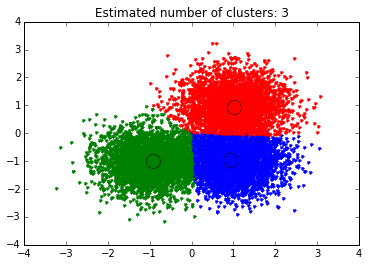

In [52]:
print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

###############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

###############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

###############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()